In [11]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from dataclasses import dataclass
import seaborn as sns

In [12]:
df = pd.read_csv(r'data_center\stock_market_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1334 entries, 0 to 1333
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   unix         1334 non-null   float64
 1   date         1334 non-null   object 
 2   symbol       1334 non-null   object 
 3   open         1334 non-null   float64
 4   high         1334 non-null   float64
 5   low          1334 non-null   float64
 6   close        1334 non-null   float64
 7   Volume XRP   1334 non-null   float64
 8   Volume USDT  1334 non-null   float64
dtypes: float64(7), object(2)
memory usage: 93.9+ KB


📊 Description des colonnes
Colonne	Type	Description
0 – unix	float64	Horodatage Unix (nombre de secondes depuis le 1er janvier 1970). Permet de classer les données chronologiquement.
1 – date	object	Date lisible ("2023-04-25" par ex.). Dupliquer du timestamp Unix mais en version humaine.
2 – symbol	object	Indique combien de dollars USDT il faut pour acheter 1 XRP. Exemple : si close = 0.65, alors 1 XRP vaut 0.65 USDT.
3 – open	float64	Prix d’ouverture : premier prix enregistré sur la période (souvent la journée).
4 – high	float64	Prix le plus haut atteint pendant la période.
5 – low	float64	Prix le plus bas atteint pendant la période.
6 – close	float64	Prix de clôture : dernier prix enregistré pendant la période.
7 – Volume XRP	float64	Volume total de XRP échangé pendant la période.
8 – Volume USDT	float64	Valeur équivalente de ces échanges exprimée en USDT.

In [13]:
df.head().T

,0,1,2,3,4
unix,1640560000000.0,1640480000000.0,1640390000000.0,1640300000000.0,1640220000000.0
date,12-27-2021,12-26-2021,12-25-2021,12-24-2021,12-23-2021
symbol,XRP-USDT,XRP-USDT,XRP-USDT,XRP-USDT,XRP-USDT
open,0.92,0.9252,0.9114,0.9941,0.9538
high,0.9237,0.9334,0.935,0.9966,1.0167
low,0.92,0.9052,0.8981,0.8964,0.9372
close,0.9226,0.92,0.9252,0.9115,0.9941
Volume XRP,2384512.0,163438501.0,250074945.0,567234092.0,479436230.0
Volume USDT,2198450.377,149939963.3,230230296.4,537703509.6,472937211.3


In [14]:
df['date'] = pd.to_datetime(df['date'])
# Dans l'ordre chronologique
df = df.sort_values(by='date').reset_index(drop=True)
df.head().T

,0,1,2,3,4
unix,1525390000000.0,1525480000000.0,1525560000000.0,1525650000000.0,1525740000000.0
date,2018-05-04 00:00:00,2018-05-05 00:00:00,2018-05-06 00:00:00,2018-05-07 00:00:00,2018-05-08 00:00:00
symbol,XRP-USDT,XRP-USDT,XRP-USDT,XRP-USDT,XRP-USDT
open,0.5,0.8898,0.9028,0.86482,0.8249
high,1.5,0.935,0.918,0.86886,0.84802
low,0.5,0.888,0.83774,0.8,0.792
close,0.8899,0.9028,0.86483,0.8249,0.80667
Volume XRP,20890213.82,16816165.3,16002035.8,17303486.4,12971303.18
Volume USDT,18946724.69,15282000.08,13997141.56,14192279.73,10571844.13


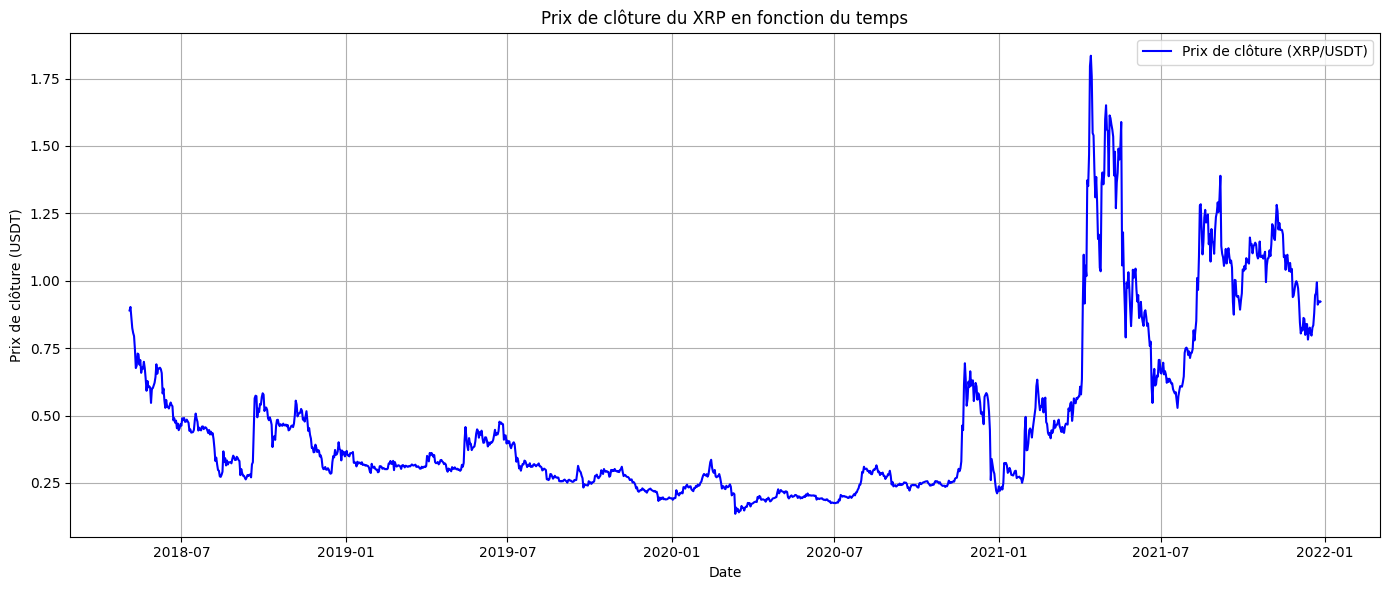

In [15]:
plt.figure(figsize=(14, 6))
plt.plot(df['date'], df['close'], label='Prix de clôture (XRP/USDT)', color='blue')

# Mise en forme
plt.title('Prix de clôture du XRP en fonction du temps')
plt.xlabel('Date')
plt.ylabel('Prix de clôture (USDT)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [16]:
df.isnull().sum()

unix           0
date           0
symbol         0
open           0
high           0
low            0
close          0
Volume XRP     0
Volume USDT    0
dtype: int64

In [17]:
df_categorical = df['symbol'].astype(str)

unique_counts = df_categorical.nunique()
unique_values = df_categorical.unique()

pd.DataFrame({'Number of Unique Values': unique_counts, 'Unique Values': unique_values})

,Number of Unique Values,Unique Values
0,1,XRP-USDT


On drop symbol

In [18]:
df = df.drop(columns=['symbol', 'unix'])

In [19]:

df.head()


,date,open,high,low,close,Volume XRP,Volume USDT
0,2018-05-04,0.50000,1.50000,0.50000,0.88990,20890213.82,18946724.69
1,2018-05-05,0.88980,0.93500,0.88800,0.90280,16816165.30,15282000.08
2,2018-05-06,0.90280,0.91800,0.83774,0.86483,16002035.80,13997141.56
3,2018-05-07,0.86482,0.86886,0.80000,0.82490,17303486.40,14192279.73
4,2018-05-08,0.82490,0.84802,0.79200,0.80667,12971303.18,10571844.13


In [20]:
df['target'] = df['close'].shift(-1)

In [21]:
df = df.dropna()
df.head()

,date,open,high,low,close,Volume XRP,Volume USDT,target
0,2018-05-04,0.50000,1.50000,0.50000,0.88990,20890213.82,18946724.69,0.90280
1,2018-05-05,0.88980,0.93500,0.88800,0.90280,16816165.30,15282000.08,0.86483
2,2018-05-06,0.90280,0.91800,0.83774,0.86483,16002035.80,13997141.56,0.82490
3,2018-05-07,0.86482,0.86886,0.80000,0.82490,17303486.40,14192279.73,0.80667
4,2018-05-08,0.82490,0.84802,0.79200,0.80667,12971303.18,10571844.13,0.79481


In [31]:
data = df[['close','target']].copy()


In [32]:
data.head()

,close,target
0,0.88990,0.90280
1,0.90280,0.86483
2,0.86483,0.82490
3,0.82490,0.80667
4,0.80667,0.79481


In [36]:
sc = MinMaxScaler(feature_range=(0, 1))
data_scaled = sc.fit_transform(data)
df_data_scaled = pd.DataFrame(data_scaled, columns=data.columns)

In [37]:
df_data_scaled.head()

,close,target
0,0.443982,0.451574
1,0.451574,0.429228
2,0.429228,0.405729
3,0.405729,0.395000
4,0.395000,0.388020


In [43]:
split_date = 1150
# training_set = df.loc[df.index < split_date].iloc[:, :-1].values
# test_set = df.loc[df.index >= split_date].iloc[:, :-1].values

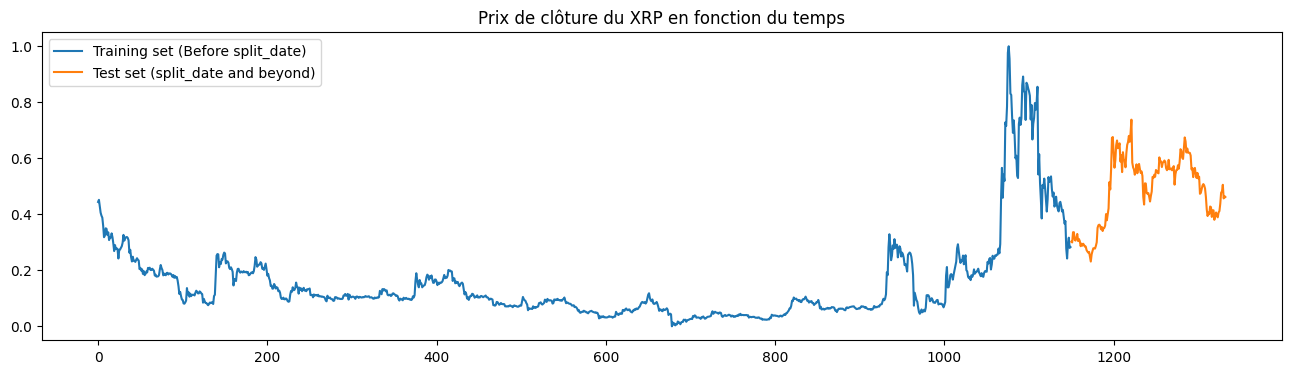

In [45]:
# Plotting the training and test sets
df_data_scaled["close"][:split_date].plot(figsize=(16, 4), legend=True)
df_data_scaled["close"][split_date:].plot(figsize=(16, 4), legend=True)
plt.legend(['Training set (Before split_date)', 'Test set (split_date and beyond)'])
plt.title('Prix de clôture du XRP en fonction du temps')
plt.show()

On prend les points avant et après 1150

In [46]:
time = df_data_scaled['close']
series = df_data_scaled['target']

In [47]:
def train_val_split(time, series, time_step=split_date):

    time_train = time[:time_step]
    series_train = series[:time_step]
    time_valid = time[time_step:]
    series_valid = series[time_step:]

    return time_train, series_train, time_valid, series_valid


# Split the dataset
time_train, series_train, time_valid, series_valid = train_val_split(time, series)

In [48]:
def windowed_dataset(series, window_size=20, batch_size=32, shuffle_buffer=1000):
    dataset = tf.data.Dataset.from_tensor_slices(series)
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
    dataset = dataset.shuffle(shuffle_buffer)
    dataset = dataset.map(lambda window: (window[:-1], window[-1]))
    dataset = dataset.batch(batch_size).prefetch(1)
    return dataset

# Apply the transformation to the training set
dataset = windowed_dataset(series_train)

In [49]:
def create_uncompiled_model():

    ### START CODE HERE

    model = tf.keras.models.Sequential([
        tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1), input_shape=[None]),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
        tf.keras.layers.Dense(1),
        tf.keras.layers.Lambda(lambda x: x * 100.0)
    ])

    ### END CODE HERE

    return model

In [50]:
# Test your uncompiled model
uncompiled_model = create_uncompiled_model()

try:
    uncompiled_model.predict(dataset)
except:
    print("Your current architecture is incompatible with the windowed dataset, try adjusting it.")
else:
    print("Your current architecture is compatible with the windowed dataset! :)")

c:\Users\alexa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\lambda_layer.py:65: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
Your current architecture is compatible with the windowed dataset! :)


c:\Users\alexa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\epoch_iterator.py:160: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


In [54]:
def adjust_learning_rate():
    model = create_uncompiled_model()

    # callback that bumps the LR each epoch
    lr_schedule = tf.keras.callbacks.LearningRateScheduler(
        lambda epoch: 1e-6 * 10**(epoch / 20)
    )

    # ✔ use learning_rate instead of lr
    optimizer = tf.keras.optimizers.SGD(learning_rate=1e-6, momentum=0.9)

    model.compile(
        loss=tf.keras.losses.Huber(),
        optimizer=optimizer,
        metrics=["mae"],
    )

    history = model.fit(dataset, epochs=100, callbacks=[lr_schedule])
    return history


In [55]:
# Run the training with dynamic LR
lr_history = adjust_learning_rate()

Epoch 1/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.5708 - mae: 0.9546 - learning_rate: 1.0000e-06
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2984 - mae: 0.6117 - learning_rate: 1.1220e-06
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2674 - mae: 0.5869 - learning_rate: 1.2589e-06
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2014 - mae: 0.4971 - learning_rate: 1.4125e-06
Epoch 5/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1594 - mae: 0.4329 - learning_rate: 1.5849e-06
Epoch 6/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1307 - mae: 0.3779 - learning_rate: 1.7783e-06
Epoch 7/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1000 - mae: 0.3149 - learning_rate: 1.9953e-06
Epoch 8/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0863 - mae: 0.2870 - learning_rate: 2.2387e-06
Epoch 9/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0895 - mae: 0.2795 - learning_rate: 2.5119e-06
Epoch 10/100
36/36 ━━━━━━━━━

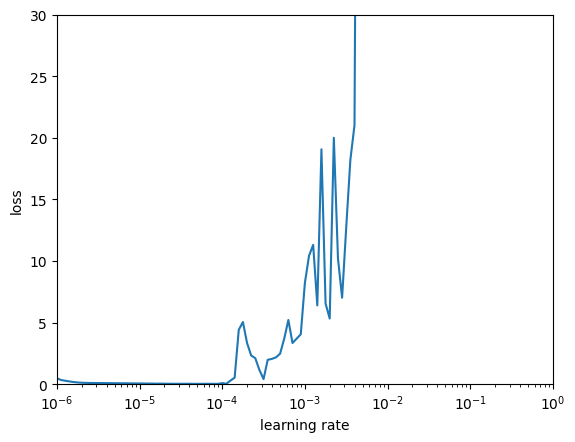

In [56]:
# number of epochs you actually ran
epochs = len(lr_history.history["loss"])

# rebuild the schedule you passed to LearningRateScheduler
lrs = 1e-6 * (10 ** (np.arange(epochs) / 20.0))

plt.semilogx(lrs, lr_history.history["loss"])
plt.axis([1e-6, 1, 0, 30])
plt.xlabel("learning rate")
plt.ylabel("loss")
plt.show()

Prendre la learning rate de 10-4 à 3*10-3

In [57]:
def create_model():
    tf.random.set_seed(51)

    model = create_uncompiled_model()

    # ✔ modern Keras: use learning_rate=
    model.compile(
        loss="mse",
        optimizer=tf.keras.optimizers.SGD(learning_rate=2e-4, momentum=0.9),
        metrics=["mae"],
    )
    return model

# build and train
model   = create_model()
history = model.fit(dataset, epochs=3)


Epoch 1/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: nan - mae: nan
Epoch 2/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: nan - mae: nan
Epoch 3/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: nan - mae: nan


In [58]:
# Save an instance of the model
model = create_model()

# Train it
history = model.fit(dataset, epochs=10)

Epoch 1/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: nan - mae: nan
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: nan - mae: nan
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: nan - mae: nan
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: nan - mae: nan
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: nan - mae: nan
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: nan - mae: nan
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: nan - mae: nan
Epoch 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: nan - mae: nan
Epoch 9/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: nan - mae: nan
Epoch 10/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: nan - mae: nan


In [59]:
def compute_metrics(true_series, forecast):

    mse = tf.keras.metrics.mean_squared_error(true_series, forecast).numpy()
    mae = tf.keras.metrics.mean_absolute_error(true_series, forecast).numpy()

    return mse, mae

In [60]:
def model_forecast(model, series, window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(32).prefetch(1)
    forecast = model.predict(ds)
    return forecast

In [68]:
print(time)

0       0.443982
1       0.451574
2       0.429228
3       0.405729
4       0.395000
          ...   
1328    0.481529
1329    0.505305
1330    0.456694
1331    0.464757
1332    0.461696
Name: close, Length: 1333, dtype: float64


In [69]:
def plot_series(time, series, format="-", start=0, end=1332):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(False)

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


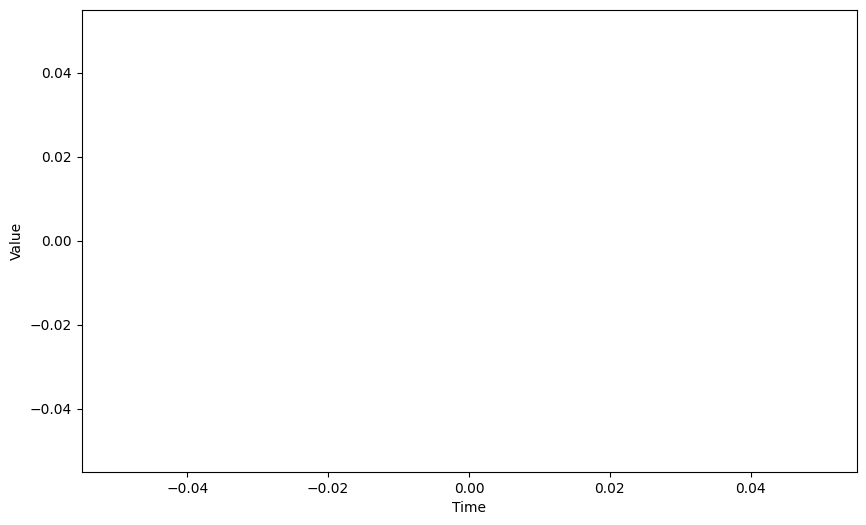

In [72]:
# Compute the forecast for all the series
rnn_forecast = model_forecast(model, series, window_size=20).squeeze()

# Slice the forecast to get only the predictions for the validation set
rnn_forecast = rnn_forecast[1150 - 20:-1]

# Plot it
plt.figure(figsize=(10, 6))

#plot_series(time_valid, series_valid)
plot_series(time_valid, rnn_forecast)